In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches
import geopandas as gpd
import seaborn as sns
import numpy as np

In [12]:
from scipy import spatial

In [13]:
os.listdir('results/result_k (0.306982 max)')

['file_9.txt',
 'file_7.txt',
 'file_6.txt',
 'file_1.txt',
 'file_2.txt',
 'file_4.txt',
 'file_3.txt',
 'file_10.txt',
 'file_8.txt',
 'file_5.txt']

In [14]:
best_res = 'results/result_k (0.306982 max)'

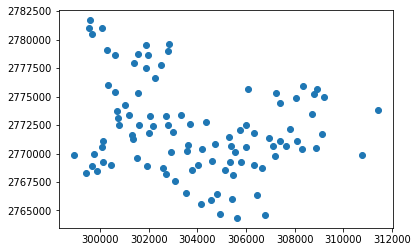

In [18]:
this_res = os.path.join(best_res, 'file_5.txt')

df_this_res =     pd.read_csv(this_res, sep='\t', header=None, names=['X', 'Y'])
#df_this_res = df_this_res.rename(columns={'x':'X', 'y':'Y'})
df_seven = df_this_res
plt.scatter(df_this_res['X'], df_this_res['Y'])

In [16]:
case_tar_txt = 'Figure 2/1415OHCA.txt'
df_tar = pd.read_csv(case_tar_txt, sep='\t')
df_tar = df_tar.rename(columns={'x':'X', 'y':'Y'})
df_tar.head()

,X,Y
0,302660.97,2768906.07
1,300760.57,2778420.05
2,302487.08,2776929.08
3,307368.25,2764711.76
4,305115.84,2764553.05


In [19]:
a = list(zip(df_seven['X'].tolist(), df_seven['Y'].tolist()))
tree = spatial.KDTree(a)

In [20]:
pts = list(zip(df_tar['X'].tolist(), df_tar['Y'].tolist()))

In [21]:
dis, iss = tree.query(pts)

In [22]:
len(iss)

1415

In [23]:
mdists = []
mdists2 = []
for i in range(len(iss)):
    seven = df_seven.iloc[iss[i]]
    seven_x, seven_y = seven['X'], seven['Y']
    case = df_tar.iloc[i]
    case_x, case_y = case['X'], case['Y']
    md = abs(case_x-seven_x)+abs(case_y-seven_y)
    mdists.append(md)
    if md<=360:
        mdists2.append(md)
len(mdists2)

734

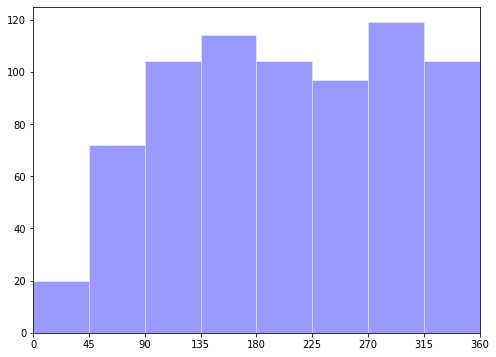

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(mdists, bins=[ i*45 for i in range(9) ], kde=False, ax=ax, hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white'})
#ax.axvline(x=45*8, ls=':', color='grey')
ax.set_xlim([0, 360])
ax.set_xticks([ i*45 for i in range(9) ])


In [25]:
45*8

360

In [26]:
a2 = list(zip(df_tar['X'].tolist(), df_tar['Y'].tolist()))
tree2 = spatial.KDTree(a2)

In [27]:
pts2 = list(zip(df_seven['X'].tolist(), df_seven['Y'].tolist()))

In [28]:
covered = tree2.query_ball_point(pts2, 45*8.)

In [29]:
covered_len = []
for cv in covered:
    covered_len.append(len(cv))


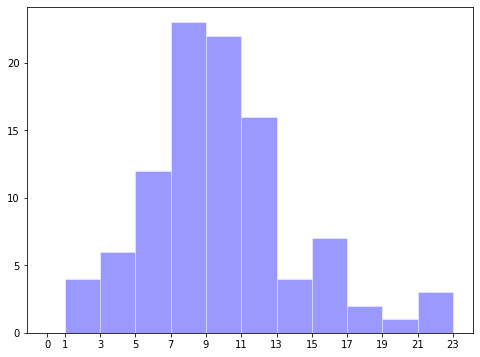

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(covered_len, kde=False, ax=ax, bins=[0]+[ 1+i*2 for i in range(12) ], hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white'})
ax.set_xticks([0]+[ 1+i*2 for i in range(12) ])

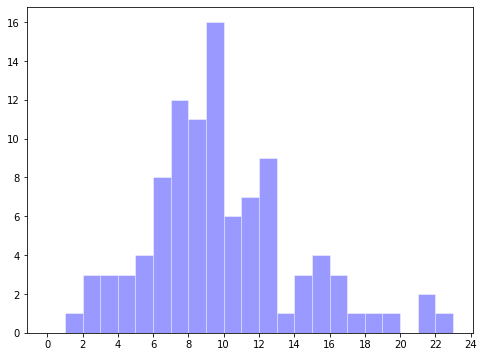

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(covered_len, kde=False, ax=ax, bins=[ i for i in range(24) ], hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white'})
ax.set_xticks([ i*2 for i in range(13) ])

In [32]:
len(df_seven)

100

In [33]:
dis3, iss3 = tree.query(pts2, 2)
dis3b = [ d[1] for d in dis3 ]

In [34]:
iss3b = [ d[1] for d in iss3 ]

In [35]:
mdists3 = []
for i in range(len(iss3b)):
    seven = df_seven.iloc[iss3b[i]]
    seven_x, seven_y = seven['X'], seven['Y']
    seven2 = df_seven.iloc[i]
    seven2_x, seven2_y = seven2['X'], seven2['Y']
    md = abs(seven2_x-seven_x)+abs(seven2_y-seven_y)
    mdists3.append(md)

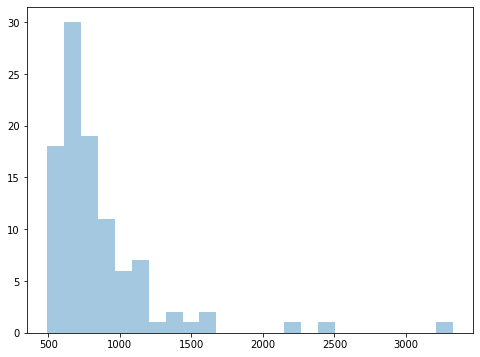

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(mdists3, kde=False, ax=ax)
#ax.axvline(x=45*8, ls=':', color='grey')

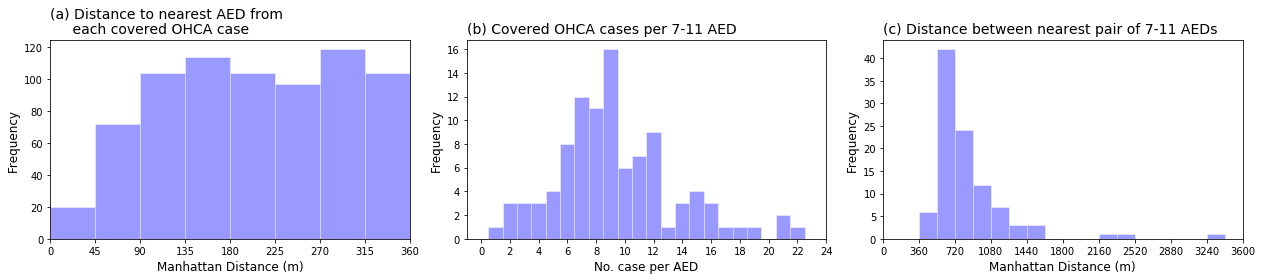

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.distplot(mdists2, bins=[ i*45 for i in range(9) ], kde=False, ax=axs[0], hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white', 'align':'mid'})
axs[0].set_xlim([0, 360])
axs[0].set_xticks([ i*45 for i in range(0,9) ])
#axs[0].set_xticklabels(list(range(1,9)))

axs[0].set_xlabel('Manhattan Distance (m)', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)


sns.distplot(covered_len, kde=False, ax=axs[1], bins=[ i for i in range(24) ], hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white', 'align':'left'})
axs[1].set_xticks([ i*2 for i in range(13) ])
axs[1].set_xlabel('No. case per AED', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_xlim([-1, 24])

sns.distplot(mdists3, kde=False, ax=axs[2], bins=[ 180*i for i in range(23) ], hist_kws={"linewidth": 1, "facecolor":'blue', 'edgecolor':'white'})
axs[2].set_xlabel('Manhattan Distance (m)', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)
axs[2].set_xlim([0, 3500])
axs[2].set_xticks([ 360*i for i in range(11) ])

labs = 'abc'
labs2 = ['Distance to nearest AED from \n     each covered OHCA case', 'Covered OHCA cases per 7-11 AED', 'Distance between nearest pair of 7-11 AEDs']
i = 0
for ax in axs:
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left', fontsize=14)
    i+=1

plt.tight_layout()
plt.savefig('new_distribution_figure.png', bbox_to_inches='tight', dpi=150)

In [112]:
np.mean(mdists2), np.std(mdists2)

(202.63765432100104, 89.44813957776618)

In [114]:
np.mean([m/45. for m in mdists2]), np.std([m/45. for m in mdists2])

(4.503058984911134, 1.987736435061471)

In [110]:
np.mean(covered_len), np.std(covered_len), np.median(covered_len)

(9.33, 4.076898330839267, 9.0)

In [116]:
np.mean(mdists3), np.std(mdists3)

(869.128999999963, 403.24165590748026)